# Visualizing Historic Stock Prices using Matplotlib

“Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations 
in Python.” – matplotlib.org

In [23]:
#To start, we need to import Matplotlib and set the mode
import pandas_datareader as pdr
import datetime as dt 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [24]:
start = dt.datetime(2012,6,30)
end = dt.datetime(2022,6,30)
cpi = pdr.get_data_yahoo("CPI.JO", start, end)

In [25]:
cpi.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-07-02,21268.375000,20118.916016,21268.375000,20287.412109,66543.0,17008.742188
2012-07-03,20539.189453,20146.998047,20335.832031,20335.832031,31534.0,17049.339844
2012-07-04,20815.175781,20248.677734,20287.412109,20771.599609,80929.0,17414.681641
2012-07-05,20752.232422,20577.925781,20742.548828,20626.343750,168821.0,17292.896484
2012-07-06,20820.017578,20626.343750,20783.220703,20723.181641,78704.0,17374.089844


<IPython.core.display.Javascript object>


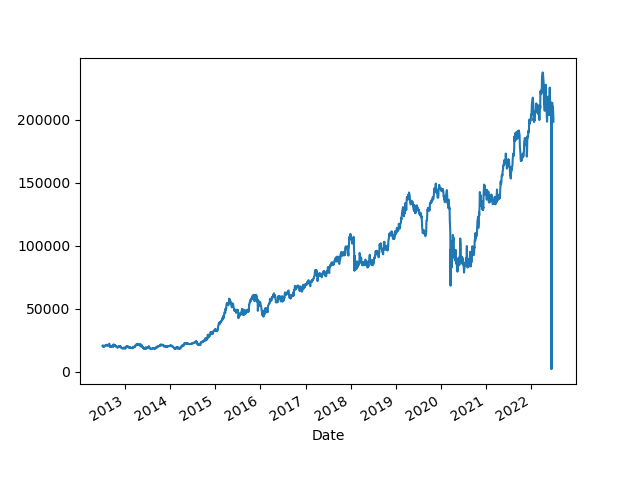

In [26]:
fig, ax = plt.subplots()
cpi['Close'].plot(ax=ax)

# Multiple-Line-Chart: Simple Moving Average 

What Is a Simple Moving Average (SMA)?
A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.- investopedia

In [27]:
#Add simple moving average to our chart

cpi['MA20'] = cpi['Close'].rolling(20).mean()
cpi['MA200'] = cpi['Close'].rolling(200).mean() 

In [28]:
#The visualisation is as follows

<IPython.core.display.Javascript object>


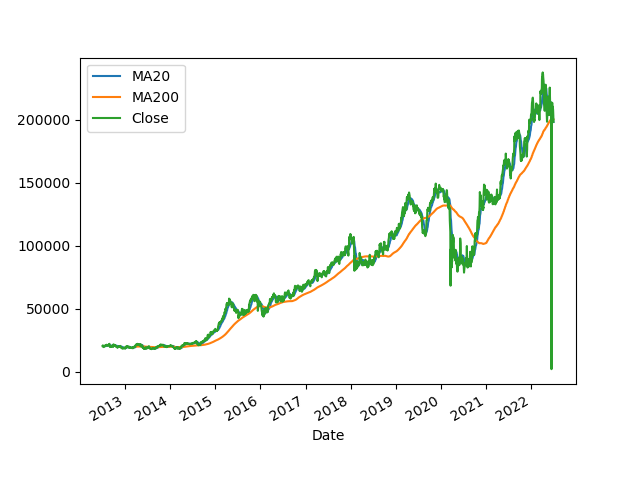

In [29]:
fig, ax = plt.subplots()
cpi[['MA20','MA200','Close']].plot(ax=ax) 

# Focusing on a specific time period of the chart

I will now focus on a specific time interval on the chart. Lets say I am only interested in the historic stock price from beginning of 2019 and forward.

<IPython.core.display.Javascript object>


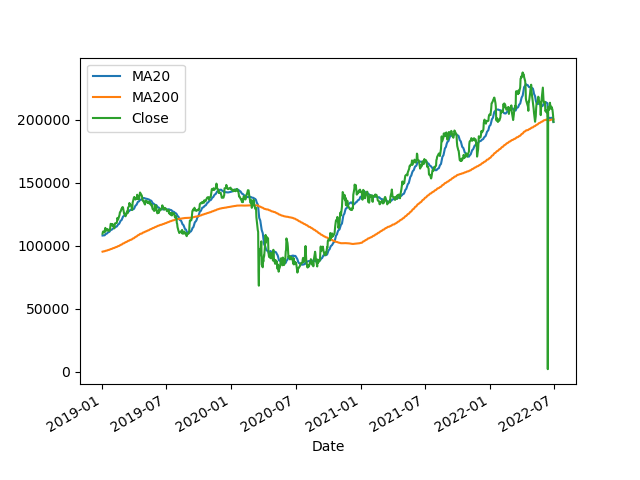

In [30]:
fig, ax = plt.subplots()
cpi[['MA20','MA200','Close']].loc['2019':].plot(ax = ax) #The .loc['2019':] command tells the dataFrame to take the data from the beginning of 2020 and forward.

# Multiple charts in one figure

<IPython.core.display.Javascript object>


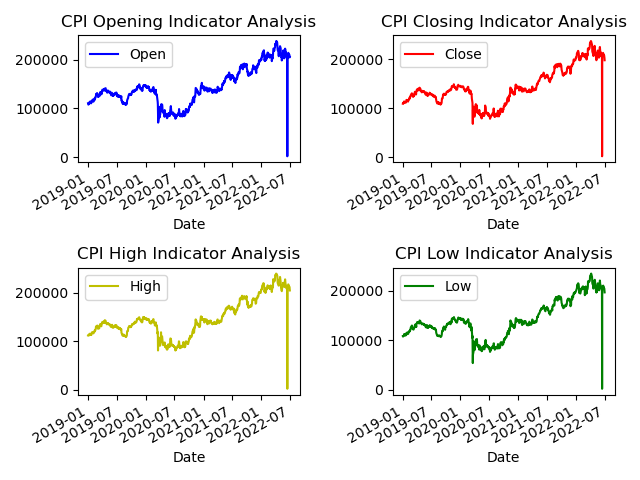

In [31]:
#How to have multiple charts (or axes) in one figure

fig, ax = plt.subplots(2, 2)   #The plt.subplots(2, 2) will return a figure with 2-by-2 axes.

#The following lines of code take the opening,closing,High and low indicator values of the stock from 2019 to 2022 ,and c='r' command has been added to indicate the colour of the line in each plot
cpi['Open'].loc['2019':].plot(ax=ax[0, 0], c = 'b') 
cpi['Close'].loc['2019':].plot(ax=ax[0, 1], c = 'r') 
cpi['High'].loc['2019':].plot(ax=ax[1, 0], c = 'y') 
cpi['Low'].loc['2019':].plot(ax=ax[1, 1], c = 'g')

#The following lines of code will call a legand for each axis
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()

#The following lines of code will set a title on each axis
ax[0, 0].set_title("CPI Opening Indicator Analysis")
ax[0, 1].set_title("CPI Closing Indicator Analysis")
ax[1, 0].set_title("CPI High Indicator Analysis")
ax[1, 1].set_title("CPI Low Indicator Analysis")
plt.tight_layout() #This line of code layers the charsts in such a way that an overlap of the text of the charts is avoided.
